In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
%matplotlib inline

from dd_vae.proposals import get_proposals
from dd_vae.utils import smoothed_log_indicator

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


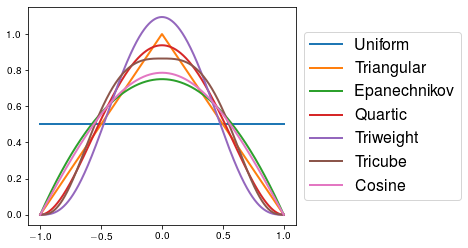

In [2]:
fig = plt.figure()
ax = plt.subplot(111)

x = np.linspace(-1, 1, 1000)
i = 0
for name in get_proposals():
    if name == 'gaussian':
        continue
    y = get_proposals()[name]().density(x)
    ax.plot(x, y, label=name.title(), linewidth=2)
    i += 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.savefig('images/kernels.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

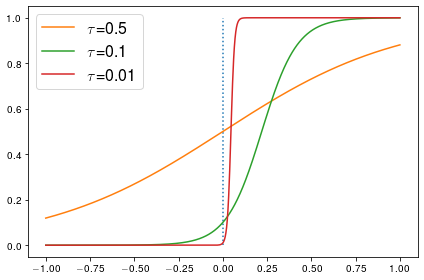

In [4]:
x = np.linspace(-1, 1, 1000)
plt.plot([0, 0], [0, 1], ':')
for temp in [0.5, 0.1, 0.01]:
    plt.plot(x, np.exp(-smoothed_log_indicator(torch.tensor(x), temp)).numpy(), label=f'$\\tau$={temp}')
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('images/smoothed_indicator.pdf')